## Wikipedia API

Here I'll be playing around with the Wikipedia API for the hackathon.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
import re
import wikipedia as wiki

In [3]:
wiki.set_lang("simple")

In [4]:
with open("UN Countries.txt", "r") as f:
    country_list = sorted(f.read().split("\n"))

In [25]:
countries = pd.DataFrame(country_list, columns=['name'])

In [6]:
from wikipedia.exceptions import DisambiguationError
import warnings
warnings.simplefilter("ignore", UserWarning)

In [7]:
country_summaries = []
wiki_names = []

for i, country in enumerate(country_list):
    
    search_results = wiki.search(country)
    wiki_name = search_results.pop(0)
    
    while True:
        try:
            summary = wiki.summary(wiki_name)
            break
        except DisambiguationError:
            wiki_name = search_results.pop(0)
    
    print(
        "\rProcessing: %s as %s (%d out of %d)%-50s" \
        %(country, wiki_name, i+1, len(country_list), ""), 
        end="")
    
    wiki_names.append(wiki_name)
    country_summaries.append(summary)

Processing: Zimbabwe as Zimbabwe (238 out of 238)                                                                                                                                                            

In [26]:
countries['wiki_name'] = wiki_names
countries['raw_summary'] = country_summaries

In [9]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [10]:
def clean_text(s):
    
    # remove 'See also' or '[Source?]' text
    s = re.sub("See also:.*|\[source\?\]|how to say:.*", "", s)
    
    # remove text in brackets
    s = re.sub("\(([^\)]*)\)", "", s)
    
    # remove new line characters
    s = s.replace("\n", " ")
    
    # remove hanging parentheses
    s = re.sub("\(|\)|\[|\]", "", s)
    
    # remove multiple spaces
    s = re.sub("\s{2,}", " ", s)
    
    # remove hanging full stops
    s = re.sub("\s+\.", ".", s)
    
    s = re.sub("\s+,", ",", s)
    s = s.replace(".,", ". ")
    
    # remove duplicate full-stops
    s = re.sub("\.{2,}", ".", s)
    
    # remove hanging spaces
    s = s.strip()
    
    return s

In [27]:
countries['clean_summary'] = countries.raw_summary.apply(clean_text)
countries['first_sent'] = countries.clean_summary.apply(lambda s: sent_tokenize(s)[0])
countries['sent_count']  = countries.clean_summary.apply(lambda s: len(sent_tokenize(s)))
countries['token_count'] = countries.clean_summary.apply(lambda s: len(word_tokenize(s)))

In [28]:
countries.head()

,name,wiki_name,raw_summary,clean_summary,first_sent,sent_count,token_count
0,Afghanistan,Afghanistan,Afghanistān (officially called Islamic Republi...,Afghanistān is a country in South Asia. It has...,Afghanistān is a country in South Asia.,8,137
1,Albania,Albania,Albania (officially called Republic of Albania...,Albania is an independent republic in Southeas...,Albania is an independent republic in Southeas...,8,109
2,Algeria,Algeria,Algeria (official name: People's Democratic Re...,Algeria is a country in the Western part of No...,Algeria is a country in the Western part of No...,5,79
3,American Samoa,American Samoa,American Samoa is a territory of the United St...,American Samoa is a territory of the United St...,American Samoa is a territory of the United St...,6,133
4,Andorra,Andorra,Andorra (officially called the Principality of...,Andorra is a European country between Spain an...,Andorra is a European country between Spain an...,9,98


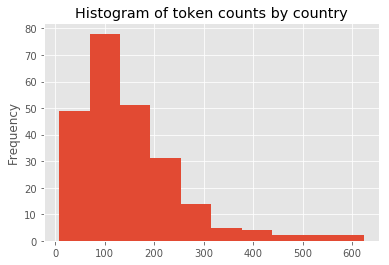

In [13]:
(countries.token_count
          .plot(kind = 'hist', 
                title = "Histogram of token counts by country"))

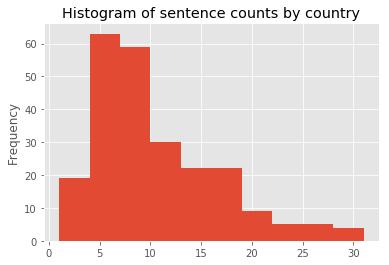

In [14]:
(countries.sent_count
          .plot(kind = 'hist', 
                title = "Histogram of sentence counts by country"))

In [15]:
countries[countries.name != countries.wiki_name]

,name,wiki_name,raw_summary,clean_summary,sent_count,token_count
14,Bahamas,The Bahamas,The Bahamas (officially called Commonwealth of...,The Bahamas is a group of islands in the West ...,7,117
25,"Bonaire, Sint Eustatius and Saba",Sint Eustatius,"Sint Eustatius, also known as Statia, or Saint...","Sint Eustatius, also known as Statia, or Saint...",10,156
34,Cabo Verde,Cape Verde,"Cape Verde (Portuguese: Cabo Verde), also know...","Cape Verde, also known as Cabo Verde and offic...",4,73
45,Cocos Islands,Cocos (Keeling) Islands,"The Territory of Cocos (Keeling) Islands, also...","The Territory of Cocos Islands, also called Co...",3,51
48,Congo,Republic of the Congo,The Republic of the Congo is a country in Afri...,The Republic of the Congo is a country in Afri...,4,61
53,Curacao,Curaçao,"Curaçao is an island in the Caribbean Sea, it ...","Curaçao is an island in the Caribbean Sea, it ...",11,185
55,Czechia,Czech Republic,"The Czech Republic (Czech: Česká republika, pr...",The Czech Republic is a country in Central Eur...,9,100
61,Dutch Sint Maarten,Saint Martin (Netherlands),Sint Maarten (or Saint Martin) is the name of ...,Sint Maarten is the name of the territory of t...,5,110
77,French Saint Martin,Saint Martin (France),"Saint Martin (French: Saint-Martin), officiall...","Saint Martin, officially the Collectivity of S...",4,59
79,Gambia,The Gambia,The Gambia is officially called the Republic o...,The Gambia is officially called the Republic o...,5,42


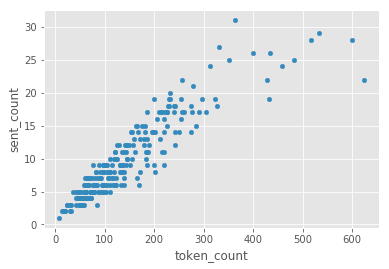

In [16]:
countries.plot(kind = 'scatter', x = 'token_count', y = 'sent_count')

In [17]:
countries.ix[countries.name == 'Czechia', 'clean_summary'].values[0]

"The Czech Republic is a country in Central Europe. As of 2 May 2016 the official short name of the country is Czechia. The capital and the biggest city is Prague. The currency is the Czech Crown. 1€ is about 27 CZK. The president of Czechia is Miloš Zeman. Czechia's population is about 10.5 million. The local language is the Czech language, a Slavic language related to languages like Slovak and Polish. Czechia has no sea; its neighbour countries are Germany, Austria, Slovakia, and Poland."

In [18]:
print("\n\n".join(list(countries.clean_summary.sample(5).values)))

Canada is a country and sovereign state in North America, located to the north of the United States. Its land reaches from the Atlantic Ocean in the east to the Pacific Ocean in the west and the Arctic Ocean to the north, covering 9.98 million square kilometres, making it the world's second-largest country by total area and the fourth-largest country by land area. It has the world's longest coastline and is the only one to touch three oceans. Canada is divided into ten provinces and three territories. Most parts of the country have a cold or severely cold winter climate, but areas to the south are warm in summer. Much of the land contains forests or tundra, with the Rocky Mountains towards the west. About four fifths of Canada's 36 million people live in urban areas near the southern border with the U.S, the longest between any two countries in the world. The national capital is Ottawa, and the largest city is Toronto; other large cities include Montreal, Vancouver, Calgary, Edmonton, 

In [20]:
list(countries.first_sent)

['Afghanistān is a country in South Asia.',
 'Albania is an independent republic in Southeastern Europe, with an area of 28,748 square kilometres.',
 'Algeria is a country in the Western part of North Africa.',
 'American Samoa is a territory of the United States in Samoan Islands, in the South Pacific Ocean.',
 'Andorra is a European country between Spain and France.',
 'Angola is a country in Africa.',
 'Anguilla is a group of five islands in the Caribbean Sea.',
 'Antigua and Barbuda is an island nation in the eastern Caribbean Sea on the boundary with the Atlantic Ocean.',
 'Argentina is a country in South America.',
 'Armenia is a country in the western part of Asia.',
 'Aruba is an island in the Caribbean Sea, just a short distance north of the Venezuelan Paraguaná Peninsula, and it forms a part of the Kingdom of the Netherlands.',
 'Australia, officially called the Commonwealth of Australia, is a country and sovereign state in the southern hemisphere, located on its own continen

In [29]:
countries.to_excel("countries.xlsx", index=None, encoding='utf-16')

In [23]:
pd.read_csv("countries.csv", encoding='utf-16')

,name,wiki_name,raw_summary,clean_summary,sent_count,token_count,first_sent
0,Afghanistan,Afghanistan,Afghanistān (officially called Islamic Republi...,Afghanistān is a country in South Asia. It has...,8,137,Afghanistān is a country in South Asia.
1,Albania,Albania,Albania (officially called Republic of Albania...,Albania is an independent republic in Southeas...,8,109,Albania is an independent republic in Southeas...
2,Algeria,Algeria,Algeria (official name: People's Democratic Re...,Algeria is a country in the Western part of No...,5,79,Algeria is a country in the Western part of No...
3,American Samoa,American Samoa,American Samoa is a territory of the United St...,American Samoa is a territory of the United St...,6,133,American Samoa is a territory of the United St...
4,Andorra,Andorra,Andorra (officially called the Principality of...,Andorra is a European country between Spain an...,9,98,Andorra is a European country between Spain an...
5,Angola,Angola,Angola (officially called the Republic of Ango...,Angola is a country in Africa. The capital is ...,4,55,Angola is a country in Africa.
6,Anguilla,Anguilla,Anguilla is a group of five islands in the Car...,Anguilla is a group of five islands in the Car...,5,79,Anguilla is a group of five islands in the Car...
7,Antigua and Barbuda,Antigua and Barbuda,Antigua and Barbuda is an island nation in the...,Antigua and Barbuda is an island nation in the...,6,76,Antigua and Barbuda is an island nation in the...
8,Argentina,Argentina,Argentina (officially the Argentine Republic) ...,Argentina is a country in South America. Argen...,9,185,Argentina is a country in South America.
9,Armenia,Armenia,Armenia (officially called the Republic of Arm...,Armenia is a country in the western part of As...,17,260,Armenia is a country in the western part of Asia.


In [32]:
countries.clean_summary.values.tolist()

['Afghanistān is a country in South Asia. It has borders with Pakistan in the south and east, Iran in the west, Turkmenistan, Uzbekistan and Tajikistan in the north, and China in the far northeast. In early times people passed through it with animals and other goods as it connected China and India with Central Asia and the Middle East. More recently, Afghanistan has been damaged by many years of war and there not being enough jobs. The country is around 251,826 square miles in size or area. There are 30 million people in Afghanistan. There are about 3 million Afghan refugees who are in Pakistan and Iran for some time. Kabul, its capital, had about 3,691,400 people living in it in 2011.',
 'Albania is an independent republic in Southeastern Europe, with an area of 28,748 square kilometres. The capital is Tirana, and other important cities are Durrës, Elbasan and Vlora. Over 3 million people live in Albania. The most Albanians are Muslims with 55%, 23% Eastern Orthodox and 15% Roman Cath